In [8]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
import scipy.integrate as integrate

# Zadanie 5.

W przestrzeni $L^2_p[-1,1]$ z funkcją wagową $w(x)=\frac{1}{\sqrt{1-x^2}}$ wielomiany czebyszewa tworzą układ ortogonalny:

$$
\int_{-1}^1T_k\left(x\right)T_j\left(x\right)\frac{{\rm{d}}x}{\sqrt{1-x^2}}
=\begin{cases} \mbox{$0$} & \mbox{: } k\neq j \\ 
\mbox{$\pi$} & \mbox{:} k=j=0 \\ 
\mbox{$\frac{\pi}{2}$} & \mbox{:} k=j\neq0 \end{cases}
$$



\{definicja z wikipedii}

In [1]:
def f(x):
    return np.exp(-x)*np.cos(x)

In [2]:
def czeb_wiel(x,k):
    try:
        x[1]
    except:
        x=[x]
    x1 = list(filter(lambda a: a<-1,x))
    x2 = list(filter(lambda a: a>=-1 and a<=1,x))
    x3 = list(filter(lambda a: a>1,x))
    result = [(-1)**k*np.cosh(k*np.arccosh(-i)) for i in x1]\
            + [np.cos(k*np.arccos(i)) for i in x2]\
            + [np.cos(k*np.arccosh(i)) for i in x3]
    return result

In [5]:
alpha = np.zeros((2,2))
alpha[0,0] = np.pi
alpha[1,1] = np.pi/2
alpha

array([[3.14159265, 0.        ],
       [0.        , 1.57079633]])

In [9]:
beta = np.zeros((2,1))
beta[0,0] = integrate.quad(lambda x: np.e**(-x)*np.cos(x)/np.sqrt(1-x**2),-1,1)[0]
beta[1,0] = integrate.quad(lambda x: x*np.e**(-x)*np.cos(x)/np.sqrt(1-x**2),-1,1)[0]

In [11]:
a1 = np.matmul(inv(alpha),beta)
a1

array([[ 0.93760848],
       [-0.73005606]])

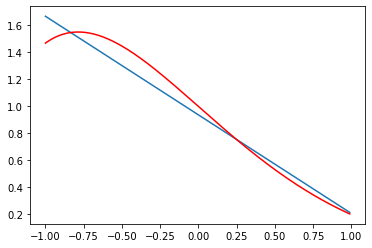

In [13]:
x = np.arange(-1,1,0.01)
cz0 = czeb_wiel(x,0)
cz1 = czeb_wiel(x,1)
y1 = [a1.item(0)*cz0[i]+a1.item(1)*cz1[i] for i in range(len(czeb_wiel(x,1)))]
plt.plot(x,y1)
plt.plot(x,f(x),color='red')

In [14]:
alpha2 = np.zeros((3,3))
alpha2[0,0] = np.pi
alpha2[1,1] = np.pi/2
alpha2[2,2] = np.pi/2
alpha2

array([[3.14159265, 0.        , 0.        ],
       [0.        , 1.57079633, 0.        ],
       [0.        , 0.        , 1.57079633]])

In [15]:
beta2 = np.zeros((3,1))
beta2[0,0] = integrate.quad(lambda x: np.e**(-x)*np.cos(x)/np.sqrt(1-x**2),-1,1)[0]
beta2[1,0] = integrate.quad(lambda x: x*np.e**(-x)*np.cos(x)/np.sqrt(1-x**2),-1,1)[0]
beta2[2,0] = integrate.quad(lambda x: (2*x**2-1)*np.e**(-x)*np.cos(x)/np.sqrt(1-x**2),-1,1)[0]

In [16]:
a2 = np.matmul(inv(alpha2),beta2)
a2

array([[ 0.93760848],
       [-0.73005606],
       [-0.08315977]])

In [18]:
x = np.arange(-1,1,0.01)
cz0 = czeb_wiel(x,0)
cz1 = czeb_wiel(x,1)
cz2 = czeb_wiel(x,2)
y2 = [a2.item(0)*cz0[i]+a2.item(1)*cz1[i]+a2.item(2)*cz2[i] for i in range(len(czeb_wiel(x,1)))]

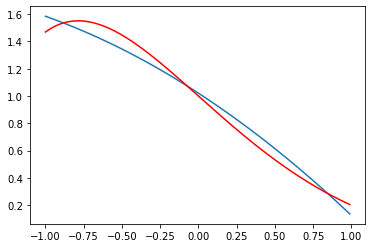

In [19]:
plt.plot(x,y2)
plt.plot(x,f(x),color='red')

In [20]:
alpha3 = np.zeros((4,4))
alpha3[0,0] = np.pi
alpha3[1,1] = np.pi/2
alpha3[2,2] = np.pi/2
alpha3[3,3] = np.pi/2
alpha3

array([[3.14159265, 0.        , 0.        , 0.        ],
       [0.        , 1.57079633, 0.        , 0.        ],
       [0.        , 0.        , 1.57079633, 0.        ],
       [0.        , 0.        , 0.        , 1.57079633]])

In [23]:
beta3 = np.zeros((4,1))
beta3[0,0] = integrate.quad(lambda x: np.e**(-x)*np.cos(x)/np.sqrt(1-x**2),-1,1)[0]
beta3[1,0] = integrate.quad(lambda x: x*np.e**(-x)*np.cos(x)/np.sqrt(1-x**2),-1,1)[0]
beta3[2,0] = integrate.quad(lambda x: (2*x**2-1)*np.e**(-x)*np.cos(x)/np.sqrt(1-x**2),-1,1)[0]
beta3[3,0] = integrate.quad(lambda x: (2*x*(2*x**2-1)-x)*np.e**(-x)*np.cos(x)/np.sqrt(1-x**2),-1,1)[0]

In [24]:
a3 = np.matmul(inv(alpha3),beta3)
a3

array([[ 0.93760848],
       [-0.73005606],
       [-0.08315977],
       [ 0.09321496]])

In [26]:
x = np.arange(-1,1,0.01)
cz0 = czeb_wiel(x,0)
cz1 = czeb_wiel(x,1)
cz2 = czeb_wiel(x,2)
cz3 = czeb_wiel(x,3)
y3 = [a3.item(0)*cz0[i]+a3.item(1)*cz1[i]+a3.item(2)*cz2[i]+a3.item(3)*cz3[i] for i in range(len(czeb_wiel(x,1)))]

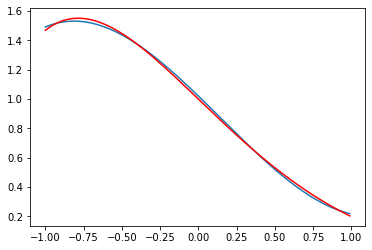

In [27]:
plt.plot(x,y3)
plt.plot(x,f(x),color='red')

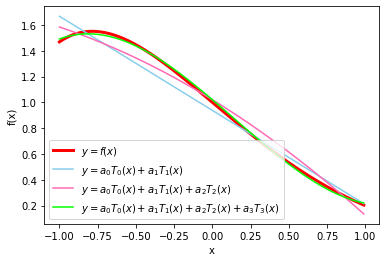

In [33]:
plt.plot(x,f(x),color='red', linewidth=3, label='$y=f(x)$')
plt.plot(x,y1, color='skyblue', label='$y=a_0T_0(x)+a_1T_1(x)$')
plt.plot(x,y2, color='hotpink', label='$y=a_0T_0(x)+a_1T_1(x)+a_2T_2(x)$')
plt.plot(x,y3, color='lime', label='$y=a_0T_0(x)+a_1T_1(x)+a_2T_2(x)+a_3T_3(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()